
## **Model VGG 16 (Pre-trained Model)**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

## VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. 
## It is considered to be one of the excellent vision model architecture till date.
## include_top = True => To include the 3 fully-connected layers at the top of the network
## weights = 'imagenet' =>  will do pre-training on ImageNet
## input_shape = optional shape tuple, only to be specified if include_top is False 
## (otherwise the input shape has to be (224, 224, 3)
## (with channels_last data format) or (3, 224, 224) (with channels_first data format). 
## It should have exactly 3 input channels, and width and height should be no smaller than 32.

In [ ]:
# clear backend
# fix the seed for random number generators
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
vgg = VGG16(include_top = False, 
            weights = 'imagenet', 
            input_shape = (64,64,3))

vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
## Retrieve a layer based on either its name (unique) or index

transfer_layer = vgg.get_layer('block5_pool')

## Freeze the vgg layers
## Set vgg.trainable to False moves all the layer's weights from trainable to non-trainable

vgg.trainable = False

In [ ]:
# Add classification layers on top of it   
x = Flatten()(transfer_layer.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)
model16 = Model(vgg.input, pred) 

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

### **Plot the model**

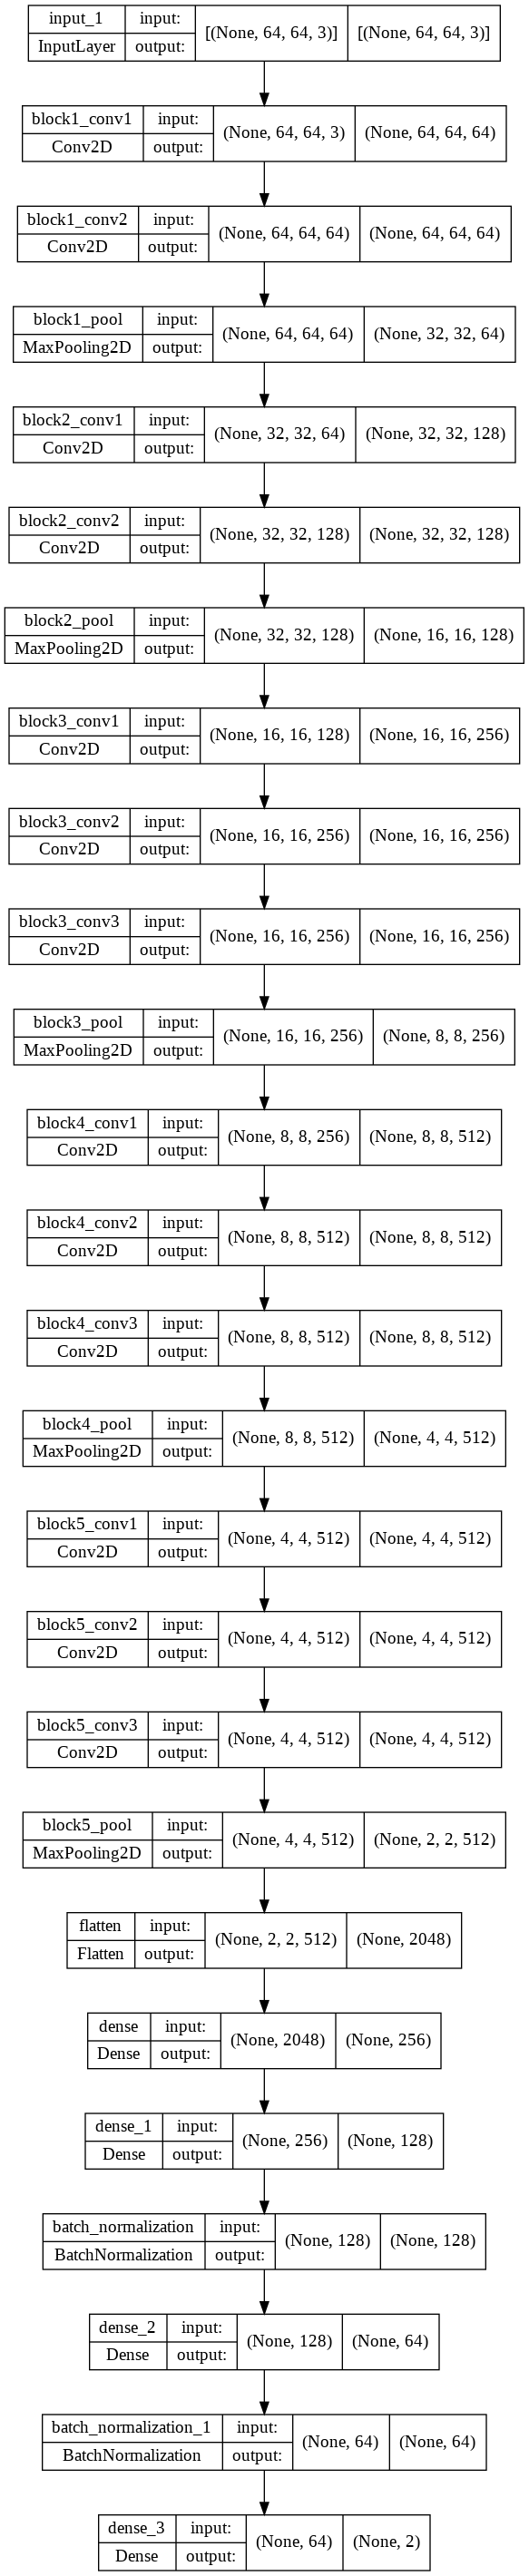

In [ ]:
plot_model(model16, 
           show_shapes = True, 
           show_layer_names = True)

####<b>Compile the model

In [ ]:
adam = optimizers.Adam(learning_rate=1e-5)
model16.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

### **Fit and Train the model**

In [ ]:
# Fit and run the model for 10 epochs
hist = model16.fit(train_images, 
                 train_labels,
                 epochs = 15,
                 callbacks = callbacks,
                 batch_size = 32,
                 validation_split = 0.2,
                 verbose = 1)

Epoch 1/15
624/624 [==============================] - 17s 24ms/step - loss: 0.2185 - accuracy: 0.9129 - val_loss: 0.3757 - val_accuracy: 0.8381
Epoch 2/15
624/624 [==============================] - 14s 22ms/step - loss: 0.1679 - accuracy: 0.9350 - val_loss: 0.2012 - val_accuracy: 0.9293
Epoch 3/15
624/624 [==============================] - 14s 22ms/step - loss: 0.1555 - accuracy: 0.9400 - val_loss: 0.0613 - val_accuracy: 0.9800
Epoch 4/15
624/624 [==============================] - 14s 22ms/step - loss: 0.1485 - accuracy: 0.9420 - val_loss: 0.0691 - val_accuracy: 0.9896
Epoch 5/15
624/624 [==============================] - 14s 22ms/step - loss: 0.1366 - accuracy: 0.9474 - val_loss: 0.1817 - val_accuracy: 0.9229


### **Plot the train and validation accuracy**

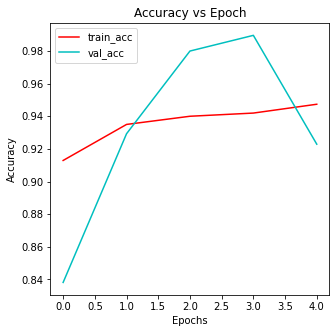

In [ ]:
# Plot the accuracies
L = len(hist.history["accuracy"])
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, L), 
  hist.history["accuracy"], 
  label="train_acc",
  color='r')
plt.plot(np.arange(0, L), 
  hist.history["val_accuracy"], 
  label="val_acc",
  color='c')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best");

### **Evaluate the model**

In [ ]:
# Evaluate the model on test data
accuracy = model16.evaluate(test_images,
                            test_labels,
                            verbose=1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 2s 21ms/step - loss: 0.1902 - accuracy: 0.9188

 Test_Accuracy:- 0.9188461303710938


### **Plot the classification report and confusion matrix**

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1300
           1       0.88      0.97      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



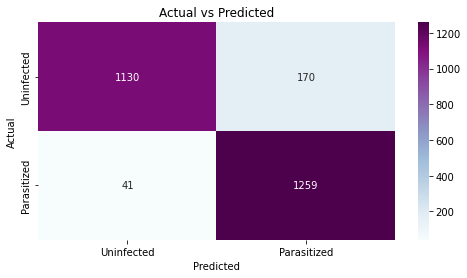

In [ ]:
# np.argmax returns the indices of the max values along axis 1
# print the classification report
pred = model16.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_tru = np.argmax(test_labels, axis = 1)
print(classification_report(y_tru, pred))

# plot the heatmap with confusion matrix
cmat = confusion_matrix(y_tru, pred)
plt.figure(figsize=(8,4))
sns.heatmap(cmat, 
            annot = True, 
            fmt='.0f', 
            cmap="BuPu",
            xticklabels=['Uninfected', 'Parasitized'], 
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Observations and Conclusions**
* **1. VGG16 pre-train model works** -
 * **1) VGG16 deals with image classification successfully** - VGG16 is a convolutional neural network trained on a subset of the ImageNet dataset, a collection of over 14 million images belonging to 22,000 categories in 2015
paper. It's a very deep convolutional network for large-Scale image recognition. We transfer Task A (VGG16) to learn in Task B (Malaria Detection)
 * **2) What makes VGG16 unique?** - Instead of having a large number of hyper-parameters VGG16 focuses on having convolution layers of 3x3 filter with a stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 
 * **4) Same input** - Digital color images are the same or similar inputs
 * **5) VGG16 has a lot more data than the Malaria Detection dataset** - The VGG16 trained with over 14M images while our the Malaria Detection dataset has less than 30K
 * **6) We could leverage low-level features from VGG16** - We believe the learning of low-level features from VGG16 could be helpful to learn in the Malaria detection
* **2. What we did** - 
 * **1) Take layers from VGG16** 
 * **2) Freeze the layers** - so as to avoid destroying any of the information they contain during future training rounds
 * **3) Add new, trainable layers on top of the frozen layers** -  They will learn to turn the old features into predictions on our new dataset
 * **4) Train the new layers on our dataset**




## **Model VGG 16 + Data Augmentation (Pre-trained Model)**

In [ ]:
# clear backend
# fix the seed for random number generators
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg16_aug = VGG16(include_top = False, 
            weights = 'imagenet', 
            input_shape = (64,64,3))

In [ ]:
vgg16_aug.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
## Retrieve a layer based on either its name (unique) or index

transfer_layer16_aug = vgg16_aug.get_layer('block5_pool')

## Freeze the vgg layers
## Set vgg_aug.trainable to False moves all the layer's weights from trainable to non-trainable

vgg16_aug.trainable = False

In [ ]:
x = Flatten()(transfer_layer16_aug.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

pred = Dense(2, activation='softmax')(x)
model16_aug = Model(vgg16_aug.input, pred) 


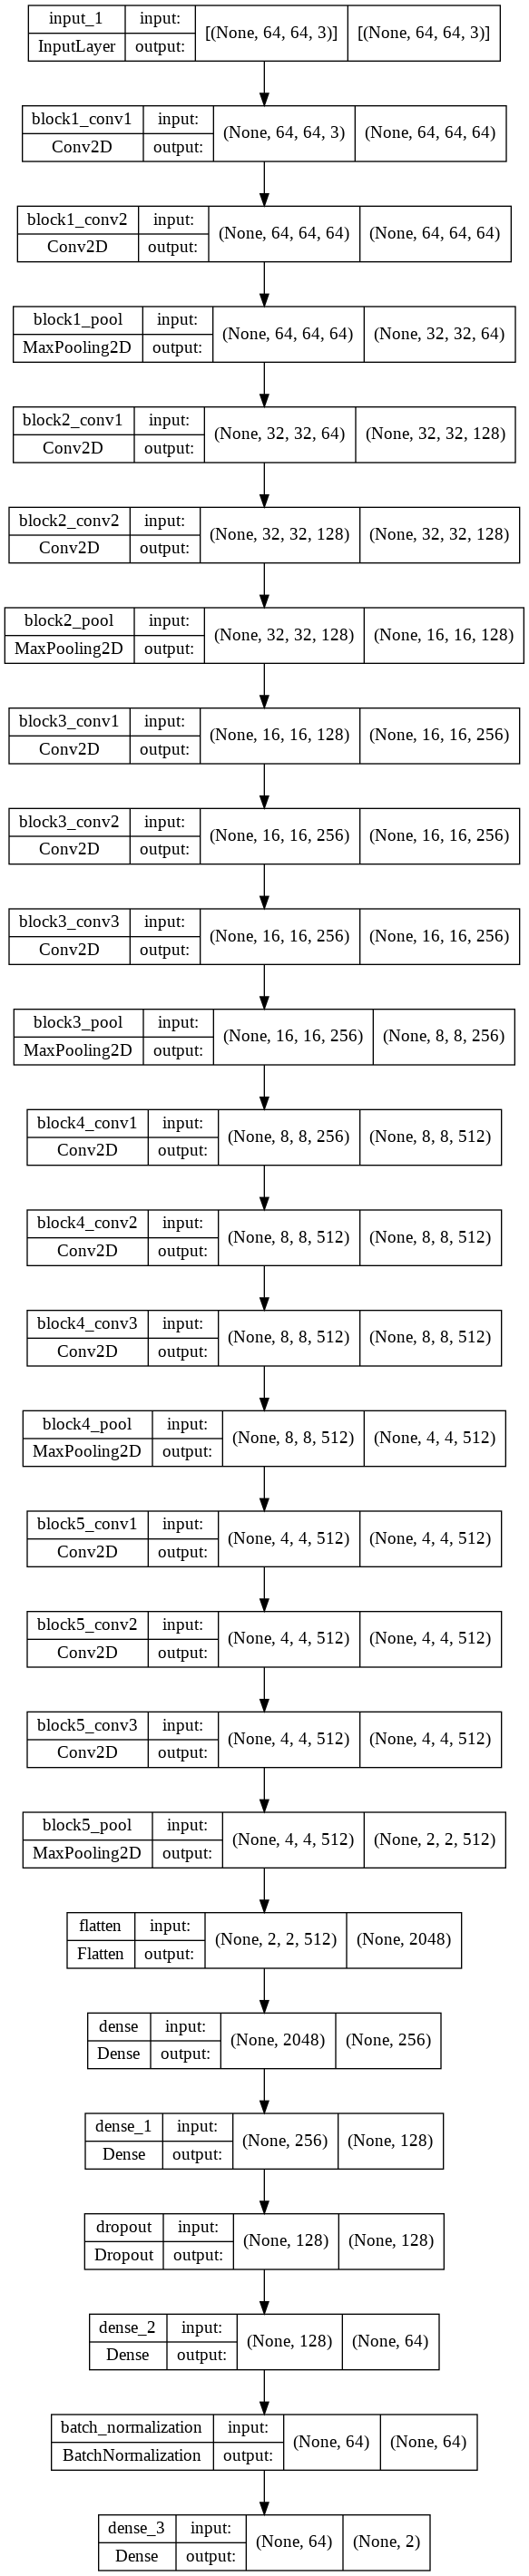

In [ ]:
plot_model(model16_aug, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
adam = optimizers.Adam(learning_rate=1e-5)
model16_aug.compile(optimizer = 'adam', 
               loss = 'binary_crossentropy', 
               metrics = (['accuracy']))

In [ ]:
# Add Callbacks to the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor ='val_loss', 
                           patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]

In [ ]:
# Fit and run the model 
his = model16_aug.fit(train_generator, 
                      validation_data = val_generator,
                      epochs = 10,
                      callbacks = callbacks,
                      batch_size = 32,
                      verbose = 1)

Epoch 1/10
390/390 [==============================] - 32s 80ms/step - loss: 0.3617 - accuracy: 0.8444 - val_loss: 0.2982 - val_accuracy: 0.8715
Epoch 2/10
390/390 [==============================] - 31s 79ms/step - loss: 0.2933 - accuracy: 0.8788 - val_loss: 0.2174 - val_accuracy: 0.9088
Epoch 3/10
390/390 [==============================] - 31s 80ms/step - loss: 0.2871 - accuracy: 0.8811 - val_loss: 0.1805 - val_accuracy: 0.9285
Epoch 4/10
390/390 [==============================] - 31s 80ms/step - loss: 0.2696 - accuracy: 0.8897 - val_loss: 0.1781 - val_accuracy: 0.9292
Epoch 5/10
390/390 [==============================] - 31s 78ms/step - loss: 0.2719 - accuracy: 0.8896 - val_loss: 0.2176 - val_accuracy: 0.9065
Epoch 6/10
390/390 [==============================] - 31s 79ms/step - loss: 0.2661 - accuracy: 0.8921 - val_loss: 0.1848 - val_accuracy: 0.9300
Epoch 7/10
390/390 [==============================] - 31s 79ms/step - loss: 0.2616 - accuracy: 0.8934 - val_loss: 0.1453 - val_accuracy:

In [ ]:
# Evaluate the model on test data
accuracy = model16_aug.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 2s 18ms/step - loss: 0.1750 - accuracy: 0.9331

 Test_Accuracy:- 0.9330769181251526


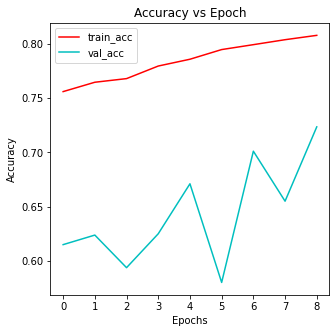

In [ ]:
L = len(hist.history["accuracy"])
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, L), 
  hist.history["accuracy"], 
  label="train_acc",
  color='r')
plt.plot(np.arange(0, L), 
  hist.history["val_accuracy"], 
  label="val_acc",
  color='c')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best");

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1300
           1       0.91      0.96      0.94      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



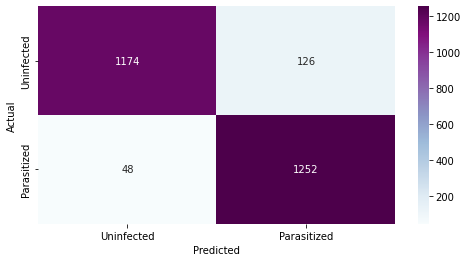

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

pred = model16_aug.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_tru = np.argmax(test_labels, axis = 1)

# Print the classification report
# Plot the heatmap using confusion matrix
print(classification_report(y_tru, pred))
cm16_aug = confusion_matrix(y_tru, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm16_aug, 
            annot = True,  
            fmt = '.0f', 
            cmap="BuPu",
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()